## Data


In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [14]:
img = cv2.imread('cosmo.jpg') 

In [15]:
img = cv2.resize(img, (1024,1024))
img = np.array(img)
img.shape

(1024, 1024, 3)

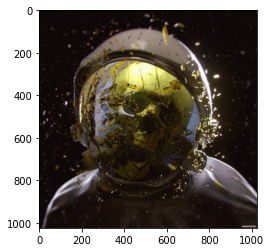

In [16]:
plt.imshow(img)

## Transformation


In [17]:
class Transformation:
  def __init__(self, img) -> None:
    self.img = img
  
  def conv(self):
    self.filters = self.get_filters()
    result = []
    for y in range(1022):
        x_line = []
        for x in range(1022):
            point = [np.sum(self.img[y : y + 3, x: x + 3] * self.filters[channel]) for channel in range(5)]
            x_line.append(point)
        result.append(x_line)
    self.result = np.array(result)
    return self.result

  def normalize(self):
    mean = self.result.mean(axis = 0)
    std = self.result.std(axis = 0)
    self.result = (self.result - mean) / (std + 10**-100)
    return self.result

  def relu(self):
    self.result = (self.result > 0) * self.result
    return self.result

  def max_pooling(self):
    result_pool = []
    for y in range(0, 1022, 2):
        x_line = []
        for x in range(0, 1022, 2):
            point = [self.result[y : y + 2, x: x + 2].max() for channel in range(5)]
            x_line.append(point)
        result_pool.append(x_line)
    self.result = np.array(result_pool)
    return self.result

  def softmax(self):
    return np.exp(self.result) / np.sum(np.exp(self.result))

  def get_filters(self):
    filters = []
    for i in range(5):
        filter = np.random.randint(0, 100, size=(3, 3, 3)) / 100
        filters.append(filter.tolist())
    return np.array(filters)

In [18]:
transform = Transformation(img)
transform.conv()
transform.normalize()
transform.relu()
transform.max_pooling()
result = transform.softmax()
result

array([[[1.83633738e-07, 1.83633738e-07, 1.83633738e-07, 1.83633738e-07,
         1.83633738e-07],
        [1.83633738e-07, 1.83633738e-07, 1.83633738e-07, 1.83633738e-07,
         1.83633738e-07],
        [1.83633738e-07, 1.83633738e-07, 1.83633738e-07, 1.83633738e-07,
         1.83633738e-07],
        ...,
        [1.83633738e-07, 1.83633738e-07, 1.83633738e-07, 1.83633738e-07,
         1.83633738e-07],
        [1.83633738e-07, 1.83633738e-07, 1.83633738e-07, 1.83633738e-07,
         1.83633738e-07],
        [1.83633738e-07, 1.83633738e-07, 1.83633738e-07, 1.83633738e-07,
         1.83633738e-07]],

       [[1.83633738e-07, 1.83633738e-07, 1.83633738e-07, 1.83633738e-07,
         1.83633738e-07],
        [1.83633738e-07, 1.83633738e-07, 1.83633738e-07, 1.83633738e-07,
         1.83633738e-07],
        [1.83633738e-07, 1.83633738e-07, 1.83633738e-07, 1.83633738e-07,
         1.83633738e-07],
        ...,
        [1.83633738e-07, 1.83633738e-07, 1.83633738e-07, 1.83633738e-07,
        